In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline


C:\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [2]:
digits = datasets.load_digits()
x = digits.data

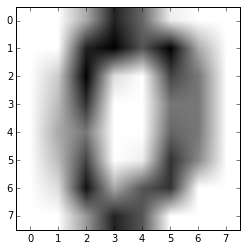

In [3]:
plt.imshow(digits.images[0].reshape(8,8),cmap=plt.cm.gray_r)

In [4]:
#k-mean clustering => intra class is small, distance of the object from different classes is maximize, similarity group together
#no knowledge about the image, just see the image and group together
#know nothing about human

In [30]:
from sklearn.cluster import KMeans

k = 10 #sort images into 10 group
kmeans = KMeans(n_clusters=k)

In [31]:
#giving all the images and sort into 10 group
kmeans.fit(x)

C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [32]:
#centroid,cluster_centers_ = 10
kmeans.cluster_centers_

array([[  0.00000000e+00,   9.42857143e-01,   1.01885714e+01,
          1.44400000e+01,   7.77142857e+00,   9.82857143e-01,
         -1.33226763e-15,  -2.77555756e-16,   2.28571429e-02,
          5.24000000e+00,   1.37200000e+01,   1.26228571e+01,
          1.16914286e+01,   3.23428571e+00,   1.71428571e-02,
          3.60822483e-16,   1.14285714e-02,   4.56000000e+00,
          8.11428571e+00,   6.13714286e+00,   1.21600000e+01,
          3.56000000e+00,   1.71428571e-02,   7.63278329e-17,
         -2.81892565e-18,   9.65714286e-01,   2.81714286e+00,
          7.00571429e+00,   1.25371429e+01,   2.56000000e+00,
          4.00000000e-02,  -5.63785130e-18,   0.00000000e+00,
          4.57142857e-02,   1.57142857e+00,   9.89714286e+00,
          1.06971429e+01,   1.45142857e+00,  -7.10542736e-15,
          0.00000000e+00,  -2.25514052e-17,   2.51428571e-01,
          4.45714286e+00,   1.12457143e+01,   7.74285714e+00,
          2.37142857e+00,   8.45714286e-01,   1.14285714e-02,
        

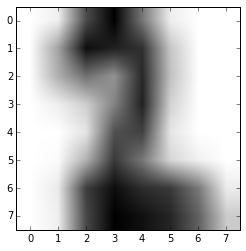

In [33]:
plt.imshow(kmeans.cluster_centers_[0].reshape(8,8),cmap=plt.cm.gray_r)

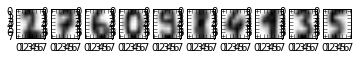

In [34]:
#sort out the similar object together
fig,axes = plt.subplots(ncols=k)

for i in range (k):
    axes[i].imshow(kmeans.cluster_centers_[i].reshape(8,8),cmap=plt.cm.gray_r)

In [43]:
#do predict, predict the 0 image at where
kmeans.predict(x[0])

array([3])

In [44]:
print(x[0])

[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]


In [45]:
#use average distance
from scipy.spatial.distance import cdist

cdist(x,kmeans.cluster_centers_).shape

(1797, 10)

In [47]:
cdist(x,kmeans.cluster_centers_)

array([[ 46.29322479,  42.92926411,  41.74284925, ...,  46.40768857,
         39.019264  ,  38.70633876],
       [ 38.2712847 ,  40.18671699,  44.37333586, ...,  35.99848538,
         43.48694142,  40.80197193],
       [ 40.16565453,  41.21270889,  43.33530869, ...,  39.71528665,
         45.66304933,  49.7787856 ],
       ..., 
       [ 39.11842574,  42.05434795,  37.88217087, ...,  41.78021783,
         43.83609201,  42.10539401],
       [ 45.07251083,  42.34886973,  41.62236787, ...,  34.86276938,
         35.28601654,  40.48304414],
       [ 37.1557314 ,  45.31163139,  33.90344356, ...,  45.55025502,
         36.70380947,  43.1824613 ]])

In [49]:
#closest distance from the cluster
np.min(cdist(x,kmeans.cluster_centers_),axis=1)

array([ 14.00270609,  25.35311368,  31.12724487, ...,  25.53488541,
        25.44506746,  32.83529162])

In [50]:
#total distance
np.sum(np.min(cdist(x,kmeans.cluster_centers_),axis=1))

44750.357569250067

In [51]:
#mean
np.mean(np.min(cdist(x,kmeans.cluster_centers_),axis=1))

24.902814451446893

In [54]:
def MeanDistortion(x,clusters):
    return np.mean(np.min(cdist(x,clusters),axis=1))

In [55]:
MeanDistortion(x,kmeans.cluster_centers_)

24.902814451446893

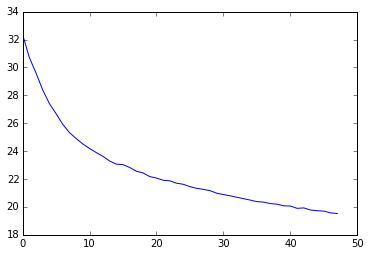

In [61]:
# k=2 to k=50 , then plot a graph
ks = range(2,50)

meanDistort =[]

for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    md = MeanDistortion(x,kmeans.cluster_centers_)
    
    #print(md)
    
    meanDistort.append(md)
    
plt.plot(meanDistort)

In [62]:
#to determine the k-algorithm

#http://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html


Automatically created module for IPython interactive environment
Fitting model on a small sub-sample of the data
done in 0.247s.
Predicting color indices on the full image (k-means)
done in 0.325s.
Predicting color indices on the full image (random)
done in 0.226s.


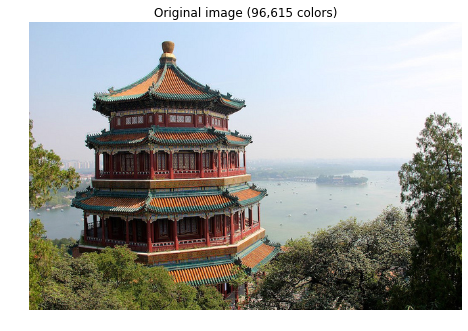

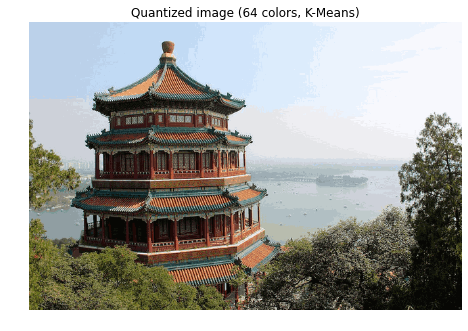

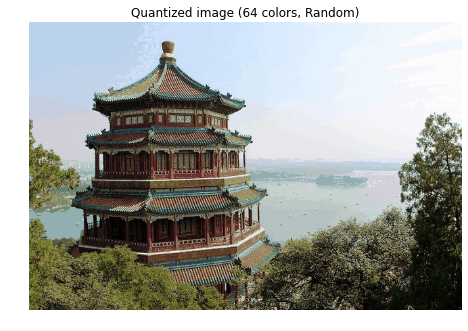

In [63]:
# Authors: Robert Layton <robertlayton@gmail.com>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#
# License: BSD 3 clause

print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 64

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
#shuffle for the first 1000 and pick it 
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))


codebook_random = shuffle(image_array, random_state=0)[:n_colors + 1]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()